In [6]:
#Importing the libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [7]:
#Loading the dataset

df=pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


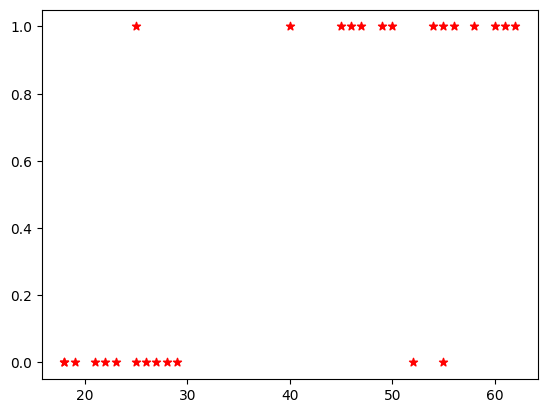

In [8]:
#Inspecting the dataset by a scatter plot

plt.scatter(df.age,df.bought_insurance,marker='*',color='red')

In [9]:
# Pre-processing the dataset by splitting it into training and testing datasets

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(df[['age']],df.bought_insurance,test_size=0.1,random_state=10)


In [10]:
# Training the model

from sklearn.linear_model import LogisticRegression as LR
model=LR()
model.fit(x_train,y_train)


LogisticRegression()

In [11]:
# PREDICTING THE CATEGORICAL DECISIONS OF A CUSTOMER EITHER HE/SHE WILL BUY INSURANCE OR NOT

PREDICTED_INS_DESC=model.predict(x_test)
PREDICTED_INS_DESC

array([1, 1, 0], dtype=int64)

In [12]:
#CHECKING THE ACCURACY OF THE MODEL

model.score(x_test,y_test)

1.0

In [13]:
#PREDICTING THE CONTINOUOUS PROBABILITY OF A CUSTOMER EITHER HE/SHE WILL BUY INSURANCE OR NOT

PRED_INS_PROB=model.predict_proba(x_test)
PRED_INS_PROB

array([[0.06470655, 0.93529345],
       [0.10327333, 0.89672667],
       [0.92775258, 0.07224742]])

c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature na

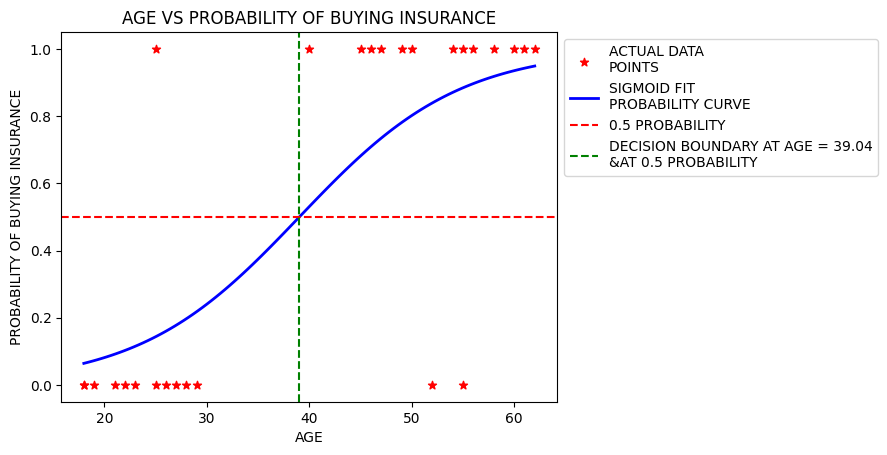

In [ ]:
# TRYING TO VISUALIZE THE RESULTS OF THE MODEL BY PLOTTING THE CONTINOUOUS
# PROBABILITY OF A CUSTOMER EITHER HE/SHE WILL BUY INSURANCE OR NOT IN THE 
#SAME SCATTERPLOT(USING THE BISECTION METHOD ALGORITHM TO FIND THE DECISION BOUNDARY) 

age_range = np.linspace(df.age.min(), df.age.max(), 100).reshape(-1, 1)
def CON_INS_BUY_PROB(ARG):
    return model.predict_proba(ARG)[:,1]

PROBABILITY = CON_INS_BUY_PROB(age_range)
def FIND_DECISION_BOUNDARY(x_low,x_high,tolerance=1e-6,max_iter=100):
    iteration = 0 
    while x_high - x_low > tolerance and iteration < max_iter:
        x_mid = (x_low + x_high) / 2
        p_mid = CON_INS_BUY_PROB(np.array([[x_mid]]))[0]

        if abs(p_mid -0.5) < tolerance: 
            return x_mid
        
        if p_mid < 0.5 :
            x_low = x_mid
        else:
            x_high = x_mid

        iteration += 1
    return (x_low+x_high)/2
    
x_at_decs_boundary=FIND_DECISION_BOUNDARY(df.age.min(),df.age.max())

plt.scatter(df.age,df.bought_insurance,marker='*',color='red',label='ACTUAL DATA\nPOINTS')
plt.plot(age_range,PROBABILITY,color='blue',linewidth=2,label="SIGMOID FIT \nPROBABILITY CURVE")
plt.axhline(y=0.5,color='red',linestyle='--',label='0.5 PROBABILITY')
plt.axvline(x=x_at_decs_boundary, color='green', linestyle='--', label=f'DECISION BOUNDARY AT AGE = {x_at_decs_boundary:.2f}\n&AT 0.5 PROBABILITY')
plt.xlabel('AGE')
plt.ylabel('PROBABILITY OF BUYING INSURANCE')
plt.title('AGE VS PROBABILITY OF BUYING INSURANCE')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# TRYING TO VISUALIZE THE RESULTS OF THE MODEL BY PLOTTING THE CONTINOUOUS
# PROBABILITY OF A CUSTOMER EITHER HE/SHE WILL BUY INSURANCE OR NOT IN THE 
# SAME SCATTERPLOT(USING THE BISECTION METHOD & NEWTON RAPSHON METHOD ALGORITHM
# TO FIND THE DECISION BOUNDARY)



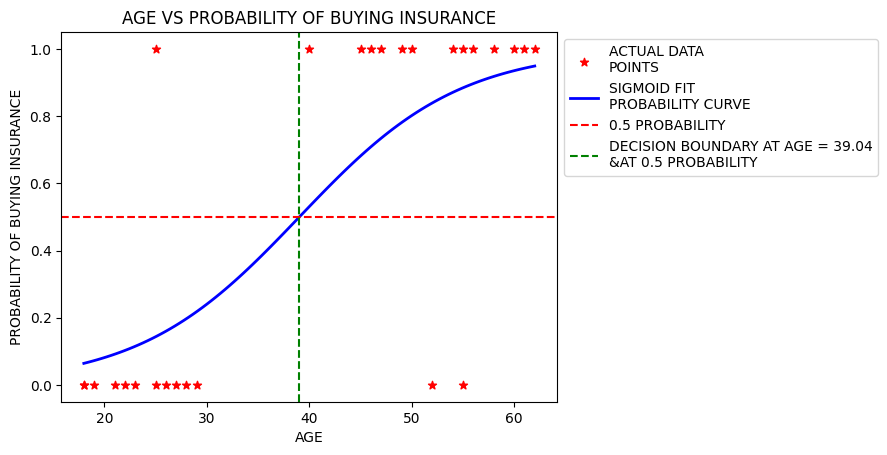

In [13]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LogisticRegression was fitted with feature names")

# TRYING TO VISUALIZE THE RESULTS OF THE MODEL BY PLOTTING THE CONTINOUOUS
# PROBABILITY OF A CUSTOMER EITHER HE/SHE WILL BUY INSURANCE OR NOT IN THE 
#SAME SCATTERPLOT(USING THE BISECTION METHOD ALGORITHM TO FIND THE DECISION BOUNDARY) 

age_range = np.linspace(df.age.min(), df.age.max(), 100).reshape(-1, 1)
age_range_df = pd.DataFrame(age_range, columns=['age'])  # Ensure the column name matches the training data

def CON_INS_BUY_PROB(ARG):
    return model.predict_proba(ARG)[:,1]

PROBABILITY = CON_INS_BUY_PROB(age_range_df)
def FIND_DECISION_BOUNDARY(x_low,x_high,tolerance=1e-6,max_iter=100):
    iteration = 0 
    while x_high - x_low > tolerance and iteration < max_iter:
        x_mid = (x_low + x_high) / 2
        p_mid = CON_INS_BUY_PROB(pd.DataFrame([[x_mid]], columns=['age']))[0]  # Ensure the column name matches the training data

        if abs(p_mid -0.5) < tolerance: 
            return x_mid
        
        if p_mid < 0.5 :
            x_low = x_mid
        else:
            x_high = x_mid

        iteration += 1
    return (x_low+x_high)/2
    
x_at_decs_boundary=FIND_DECISION_BOUNDARY(df.age.min(),df.age.max())

plt.scatter(df.age,df.bought_insurance,marker='*',color='red',label='ACTUAL DATA\nPOINTS')
plt.plot(age_range,PROBABILITY,color='blue',linewidth=2,label="SIGMOID FIT \nPROBABILITY CURVE")
plt.axhline(y=0.5,color='red',linestyle='--',label='0.5 PROBABILITY')
plt.axvline(x=x_at_decs_boundary, color='green', linestyle='--', label=f'DECISION BOUNDARY AT AGE = {x_at_decs_boundary:.2f}\n&AT 0.5 PROBABILITY')
plt.xlabel('AGE')
plt.ylabel('PROBABILITY OF BUYING INSURANCE')
plt.title('AGE VS PROBABILITY OF BUYING INSURANCE')
plt.legend(bbox_to_anchor=(1,1))
plt.show()